In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as la
from mpl_toolkits.mplot3d import Axes3D

# Construcción de la ecuación 3-D (Patrón de oscilación)

Es importante definirla en el origen

Si hay columnas con np.NaN entonces se debe remover el índice de la columna, obtener la eofs y después volverlas a colocar a la hora de desdoblarlos

In [153]:
x,y=np.arange(-2,2.02,0.05),np.arange(-2,2.02,0.05)
#Creación de la malla (extiende la x tantas veces como y haya)
X,Y=np.meshgrid(x,y)
f1=np.cos(Y)+np.sin(X)

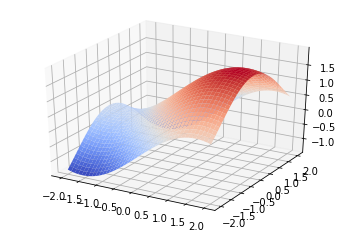

In [154]:
fig = plt.figure()
ax = fig.gca(projection="3d")
surf1=ax.plot_surface(X,Y,f1,cmap="coolwarm")
fig2.colorbar(surf2,shrink=0.8,aspect=5)

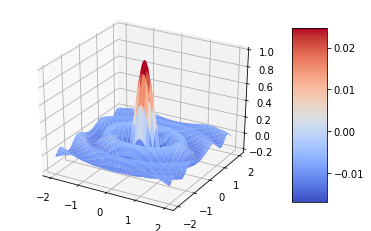

In [155]:
f2=np.sinc(np.sqrt((X*2)**2+(Y*3)**2))
fig2=plt.figure()
ax = fig2.gca(projection="3d")
surf12=ax.plot_surface(X,Y,f2,cmap="coolwarm")
fig2.colorbar(surf2,shrink=0.8,aspect=5)

# Creación del modulador de tiempo

In [156]:
modulador=np.sin(np.arange(0,200,1)/199*10*np.pi)  #Este es el patrón dominante en el tiempo
modulador_2=np.sin(np.arange(0,200,1)/199*20*np.pi)

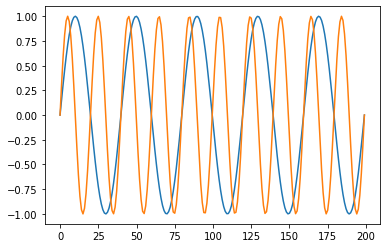

In [157]:
plt.plot(modulador)
plt.plot(modulador_2)

# Creación de las matrices

In [159]:
matriz_f1=np.zeros([len(modulador),len(x),len(y)])
matriz_f2=np.zeros([len(modulador_2),len(x),len(y)])
matriz_f3=(matriz_f1/np.max(matriz_f1))+(matriz_f2/np.max(matriz_f2))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [160]:
for i in range(len(modulador)):
    matriz_f1[i,:,:]=f1*modulador[i]
    matriz_f2[i,:,:]=f2*modulador_2[i]

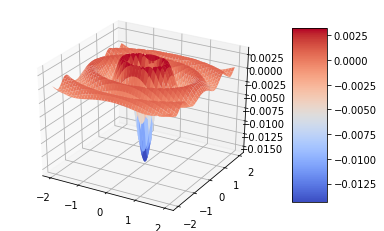

In [161]:
f2=np.sinc(np.sqrt((X*2)**2+(Y*3)**2))
fig2=plt.figure()
ax = fig2.gca(projection="3d")
surf2=ax.plot_surface(X,Y,matriz_f2[10,:,:],cmap="coolwarm")
fig2.colorbar(surf2,shrink=0.8,aspect=5)

# Construcción de A

In [162]:
Af1=np.reshape(matriz_f1,(len(modulador),len(x)*len(y)))
Af2=np.reshape(matriz_f2,(len(modulador_2),len(x)*len(y)))
Af3=np.reshape(matriz_f2,(len(modulador_2),len(x)*len(y)))
Af3_corr=np.zeros_like(Af3)#Será una combinación de los modos

In [170]:
for i in range(len(x)*len(y)):
    Af3_corr[:,i]=np.std(Af3[:,i]-np.mean(Af3[:,i]))

Se escala la matriz de Af3 para que queden correlaciones y no covarianzas

In [171]:
U_f1,S_f1,Vh_f1=np.linalg.svd(Af1)
U_f2,S_f2,Vh_f2=np.linalg.svd(Af2)
U_f3,S_f3,Vh_f3=np.linalg.svd(Af3)
U_f3_cor,S_f3_cor,Vh_f3_cor=np.linalg.svd(Af3_corr)

De donde:
- U son las componentes principales
- S son los valores propios para cada componente principal: información de la varianza
- Vh son las EOFs

Text(0, 0.5, 'Porcentaje de varianza')

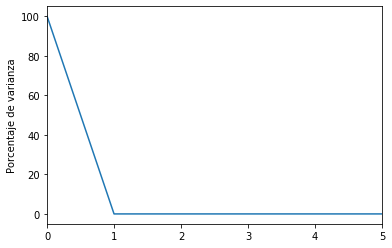

In [178]:
plt.figure()
# plt.plot((S_f1/np.sum(S_f1))*100)
# plt.plot((S_f2/np.sum(S_f2))*100)
# plt.plot((S_f3/np.sum(S_f3))*100)
plt.plot((S_f3_cor/np.sum(S_f3_cor))*100)
plt.xlim(0,5)
plt.ylabel("Porcentaje de varianza")

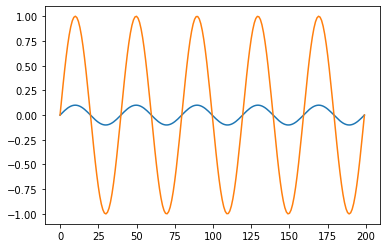

In [168]:
# plt.plot(U_f1[0,:])
plt.plot(U_f1[:,0]) # Notar que este es el modulador es una componente principal
plt.plot(modulador)

Un figure array con la EOF, la PC y la transformada de Fourier

Espacio-tiempo-escala temporal principal

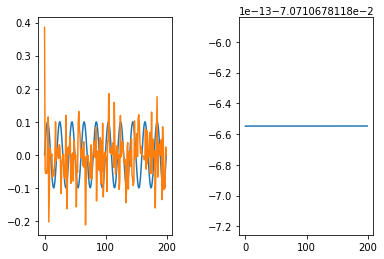

In [181]:
plt.subplot(121)
plt.plot(U_f3[:,0])# Notar que este es el modulador es una componente principal
plt.plot(U_f3[:,1])

plt.subplot(122)
plt.plot(U_f3_cor[:,0])# Notar que este es el modulador es una componente principal
# plt.plot(U_f3_cor[:,1])

plt.subplots_adjust(wspace=0.5)
# plt.plot(U_f3[:,2])# Al ser una componente principal no tan importante, al multiplicarse por su componente
                 #espacial debe ser casi 0
# plt.plot(modulador_2)

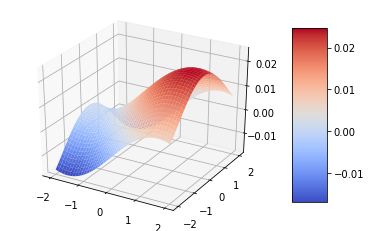

In [151]:
EOF_f1=Vh_f1[0,:].reshape([len(x),len(y)])


fig2=plt.figure()
ax = fig2.gca(projection="3d")
surf2=ax.plot_surface(X,Y,EOF_f1,cmap="coolwarm")
fig2.colorbar(surf2,shrink=0.8,aspect=5)

Siempre pensar en la EOF como algo que varía

- Como filtrar un modo de oscilación

In [185]:
EOF1_f3_cor=Vh_f3_cor[0,:].reshape([len(x),len(y)])
EOF2_f3_cor=Vh_f3_cor[1,:].reshape([len(x),len(y)])

NameError: name 'EOF_f3_cor' is not defined

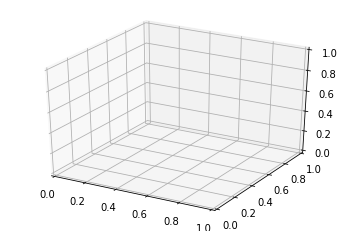

In [188]:
fig2=plt.figure()
ax = fig2.gca(projection="3d")
surf2=ax.plot_surface(X,Y,EOF_f3_cor,cmap="coolwarm")
fig2.colorbar(surf2,shrink=0.8,aspect=5)